In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer, RobustScaler

In [3]:

path = r"D:\telecom_customer_churn.csv"

In [4]:
df = pd.read_csv(path)

In [5]:
df.drop('Customer ID', axis=1, inplace=True)
df.drop('Zip Code', axis=1, inplace=True)
df.drop('Latitude', axis=1, inplace=True)
df.drop('Longitude', axis=1, inplace=True)
df.drop('Churn Category', axis=1, inplace=True)
df.drop('Customer Status', axis=1, inplace=True)
df.drop('Churn Reason', axis=1, inplace=True)
df.drop('Offer',axis=1,inplace=True)



In [6]:
df.isnull().sum()

Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Number of Referrals                     0
Tenure in Months                        0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                     1526
Streaming Music                      1526
Unlimited Data                       1526
Contract                                0
Paperless Billing                       0
Payment Method                    

In [7]:
cols_to_fill = [
    'Multiple Lines',
    'Internet Type',
    'Online Security',
    'Online Backup',
    'Device Protection Plan',
    'Premium Tech Support',
    'Streaming TV',
    'Streaming Movies',
    'Streaming Music',
    'Unlimited Data'
]

for col in cols_to_fill:
    df[col] = df[col].fillna(df[col].mode()[0])





In [8]:
cols = ['Avg Monthly Long Distance Charges', 'Avg Monthly GB Download']
imputer = KNNImputer(n_neighbors=3)
df[cols] = imputer.fit_transform(df[cols])


In [9]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

binary_cols = [
    'Married', 'Phone Service', 'Multiple Lines', 'Internet Service',
    'Online Security', 'Online Backup', 'Device Protection Plan',
    'Streaming Music',
    'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
    'Unlimited Data', 'Paperless Billing'
]


for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})


multi_cat_cols = ['Internet Type', 'Contract', 'Payment Method']

    
le = LabelEncoder()
for col in multi_cat_cols:
    df[col] = le.fit_transform(df[col])



In [10]:
location_target_mean = df.groupby('City')['Total Revenue'].mean()
df['City'] = df['City'].map(location_target_mean)


<Axes: >

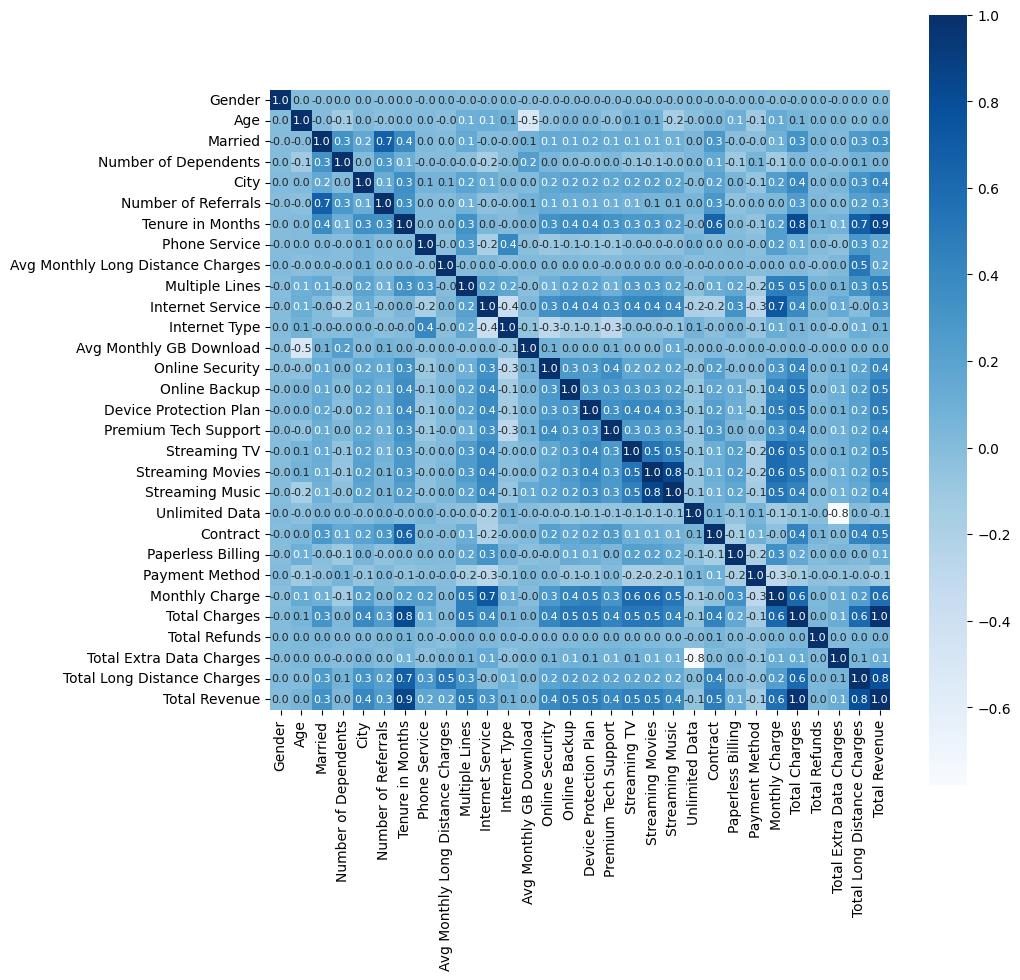

In [11]:
correlation=df.corr()



plt.figure(figsize=(10,10))
sns.heatmap(
    correlation,
    cbar=True,
    square=True,
    fmt='.1f', 
    annot=True,
    annot_kws={'size': 8},
    cmap='Blues'
)

In [12]:
df=df.drop('Gender',axis=1)
df=df.drop('Age',axis=1)
df=df.drop('Contract',axis=1)
df=df.drop('Married',axis=1)
df=df.drop('Number of Dependents',axis=1)
df=df.drop('Monthly Charge',axis=1)



<Axes: >

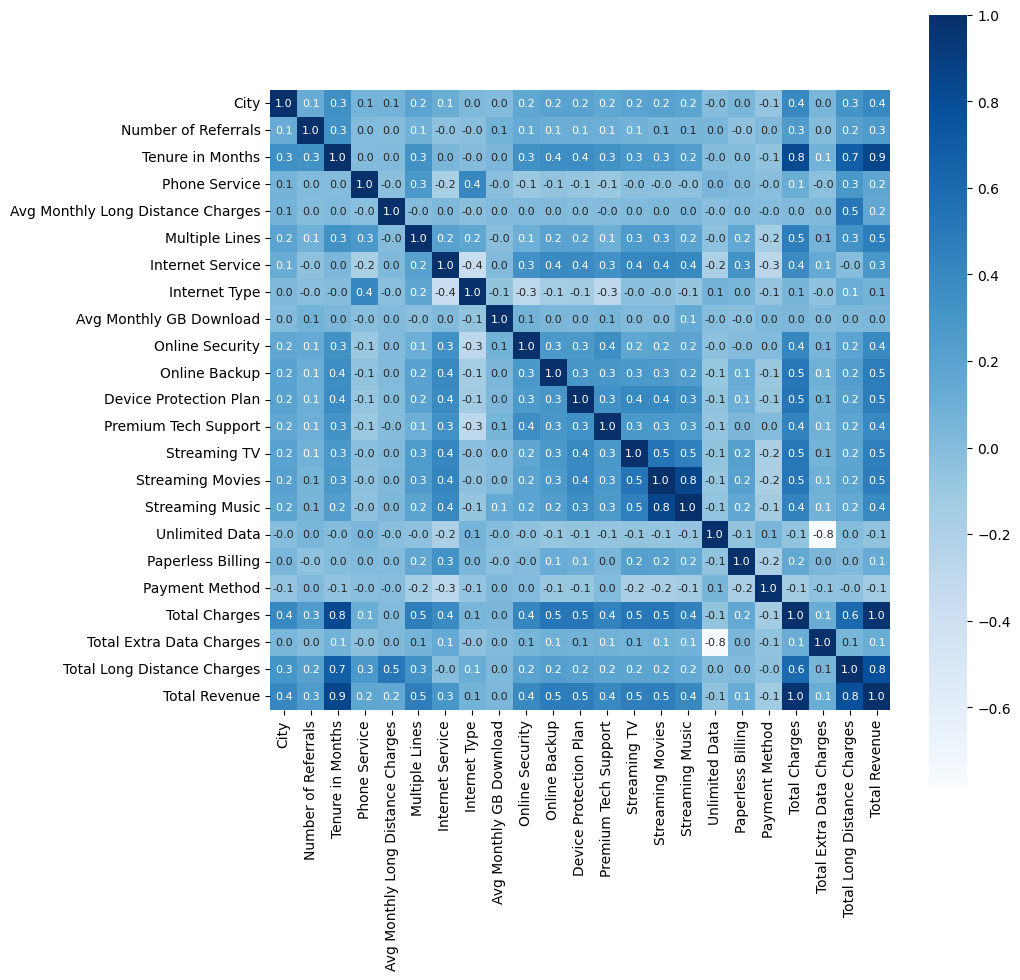

In [13]:
df=df.drop('Total Refunds',axis=1)
correlation=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(
    correlation,
    cbar=True,
    square=True,
    fmt='.1f', 
    annot=True,
    annot_kws={'size': 8},
    cmap='Blues'
)

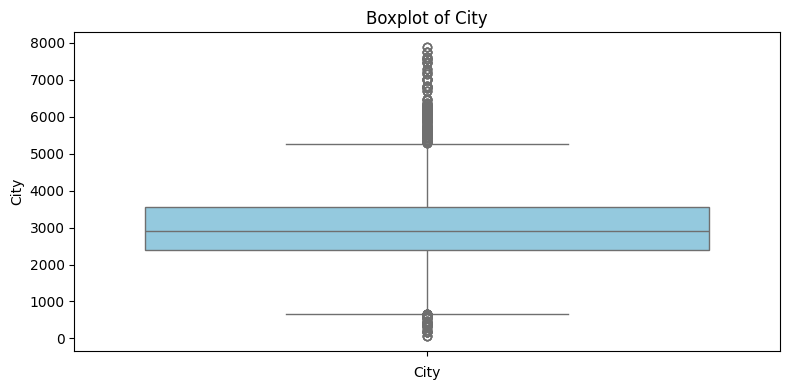

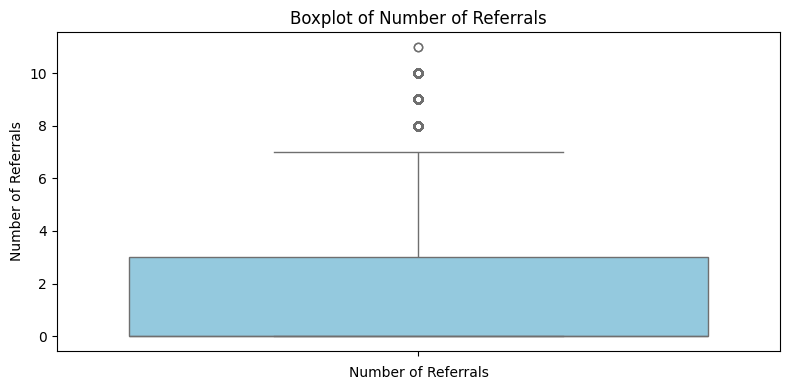

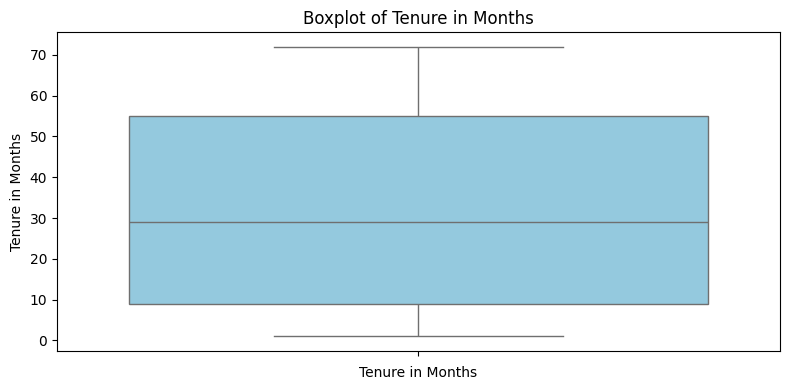

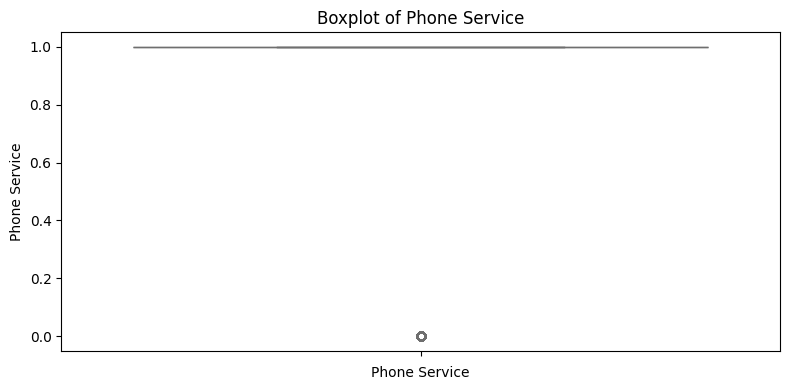

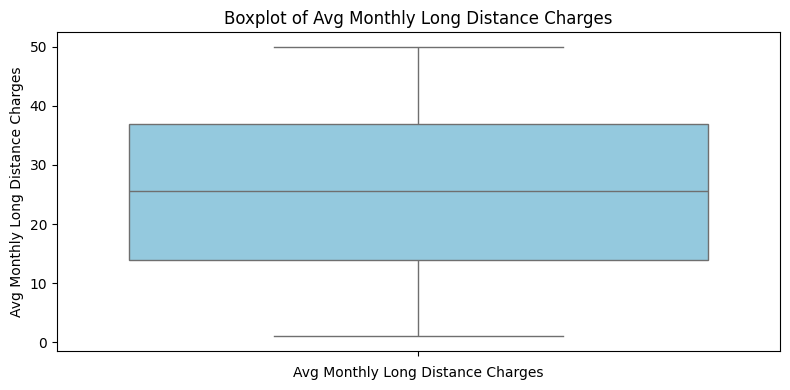

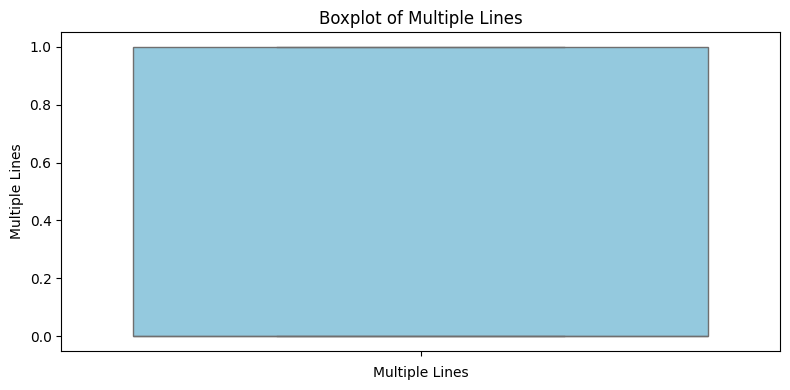

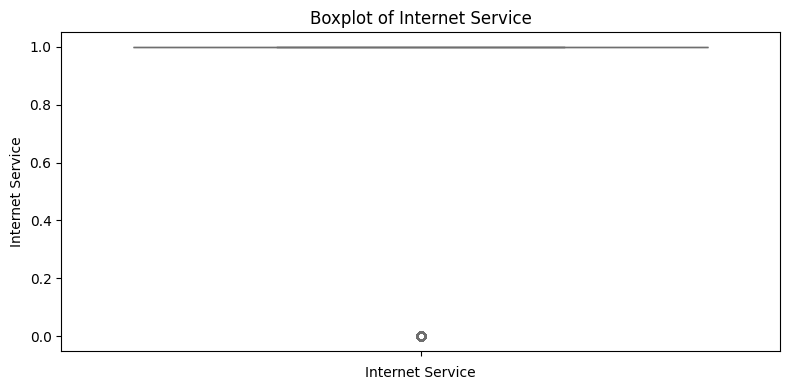

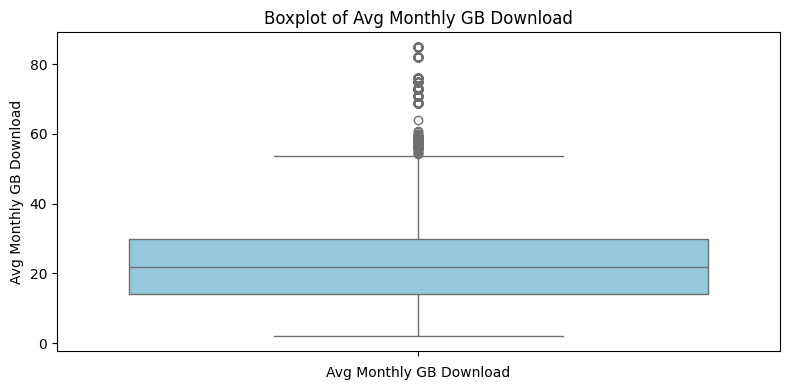

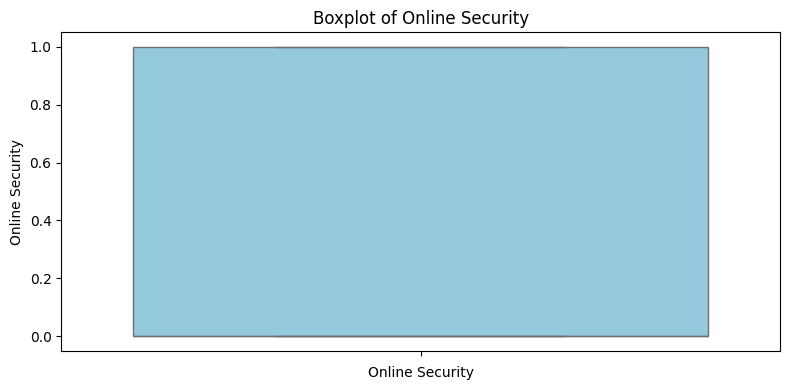

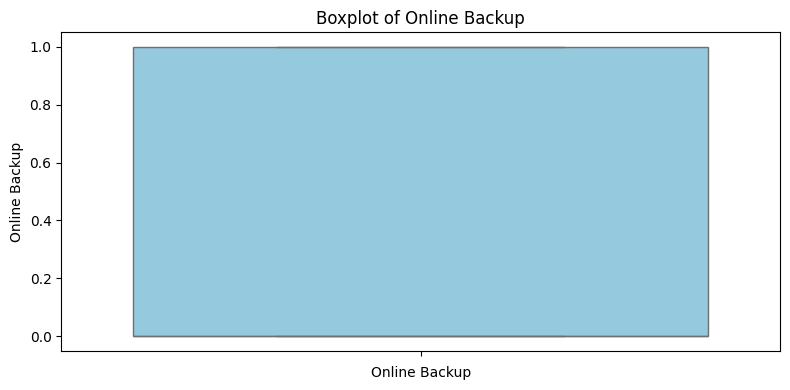

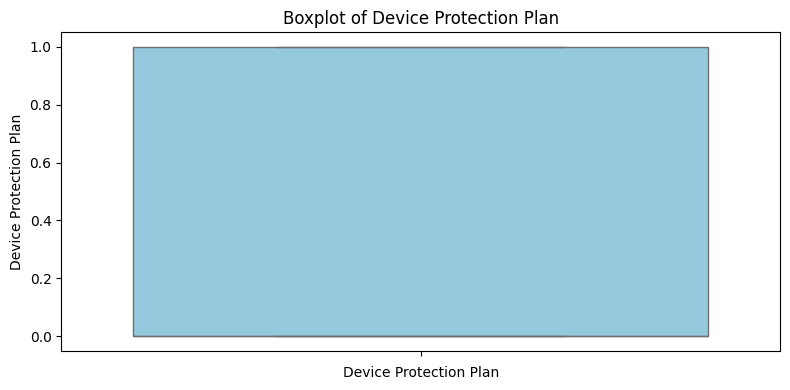

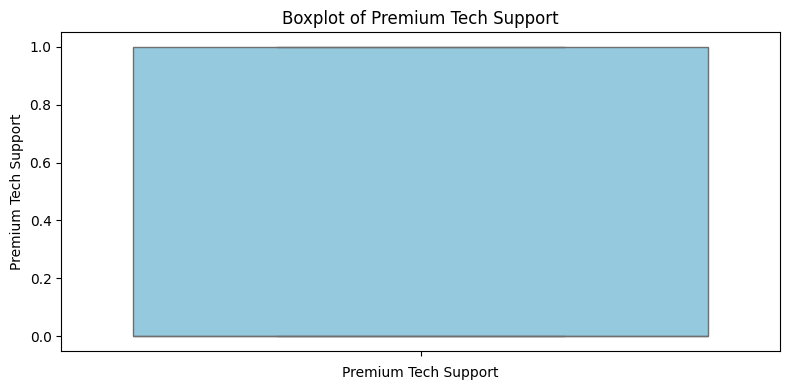

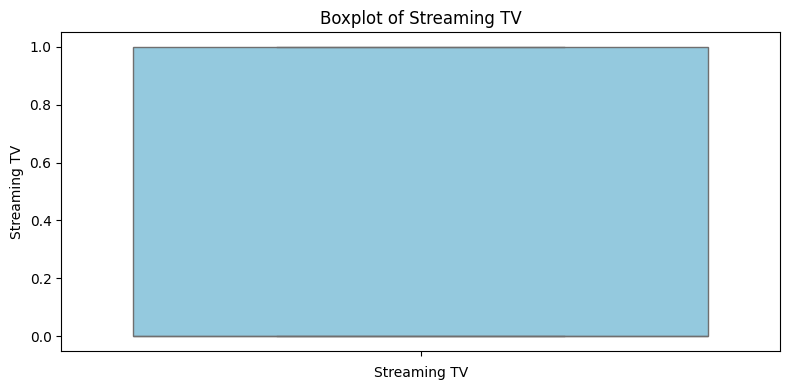

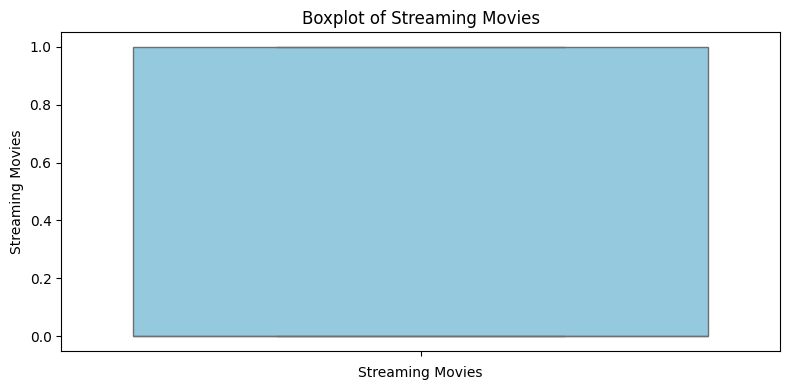

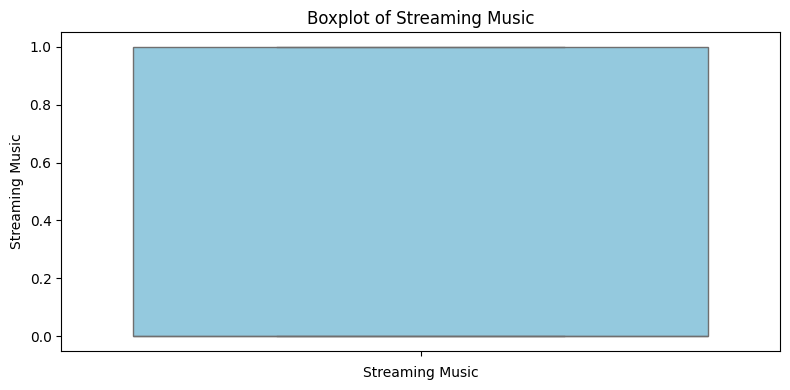

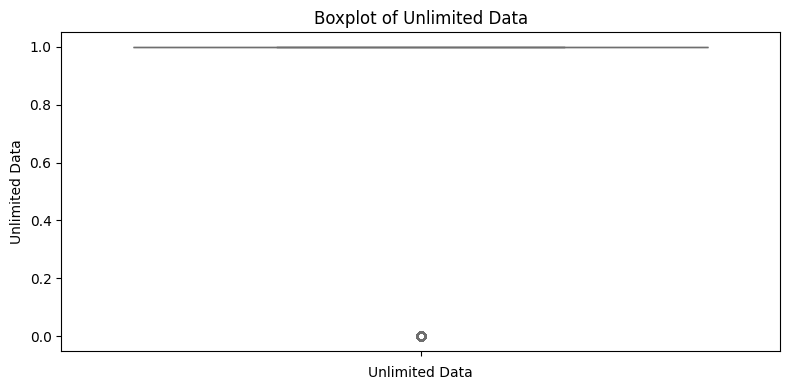

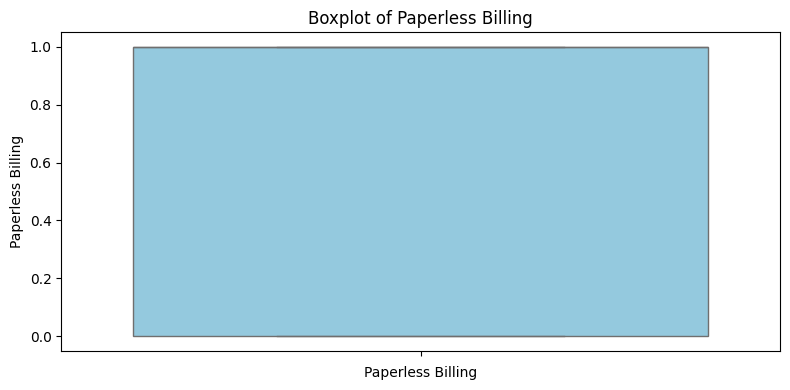

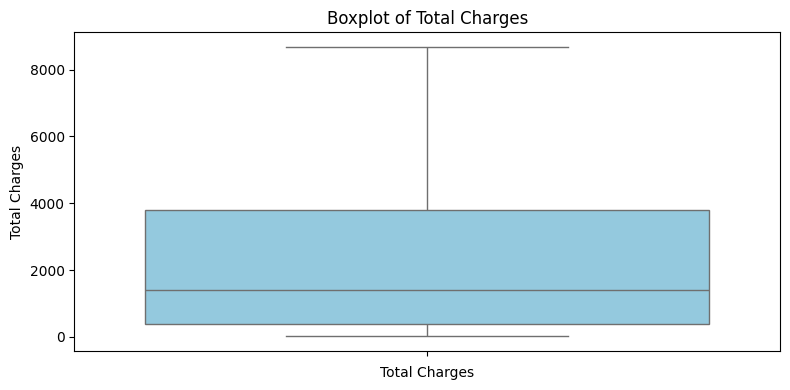

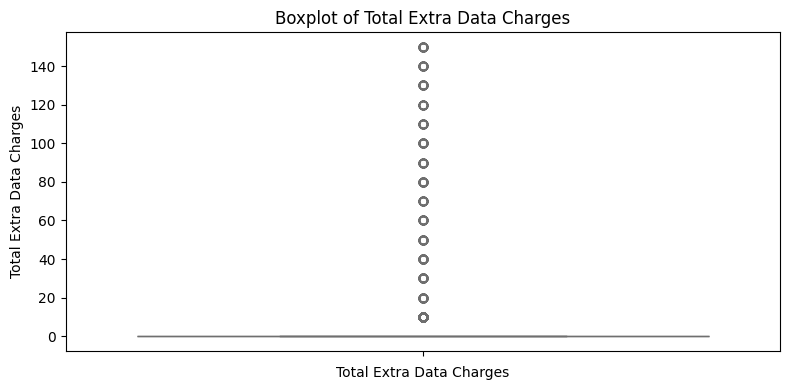

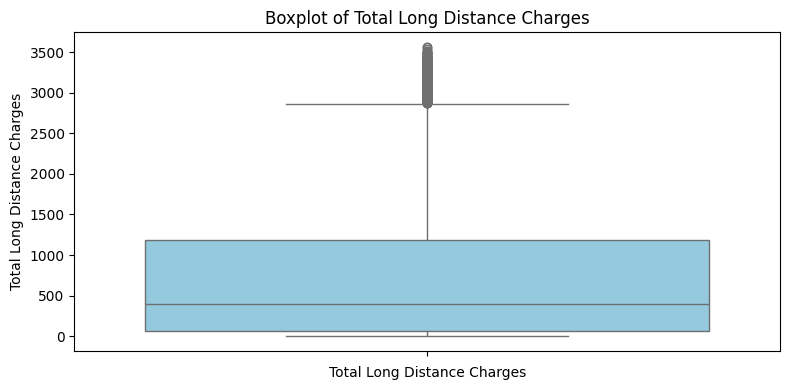

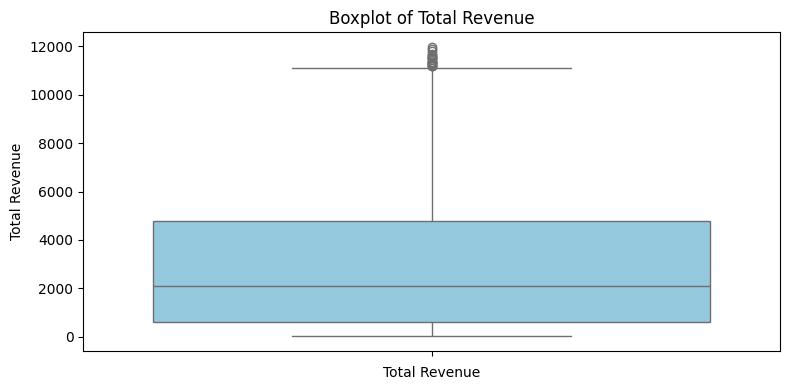

In [14]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


In [15]:

df['Total Long Distance Charges'] = zscore(df['Total Long Distance Charges'])

df.head()







,City,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,...,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Paperless Billing,Payment Method,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,3312.31500,2,9,1,42.39,0,1,0,16.0,0,...,1,0,0,1,1,1,593.30,0,-0.434195,974.81
1,2269.43875,0,9,1,10.69,1,1,0,10.0,0,...,0,1,1,0,0,1,542.40,10,-0.771190,610.28
2,3658.68125,0,4,1,33.65,0,1,2,30.0,0,...,0,0,0,1,1,0,280.85,0,-0.725844,415.45
3,3926.73250,1,13,1,27.82,0,1,2,4.0,0,...,1,1,0,1,1,0,1237.85,0,-0.457641,1599.51
4,3637.67000,3,3,1,7.38,0,1,2,11.0,0,...,1,0,0,1,1,1,267.40,0,-0.858681,289.54


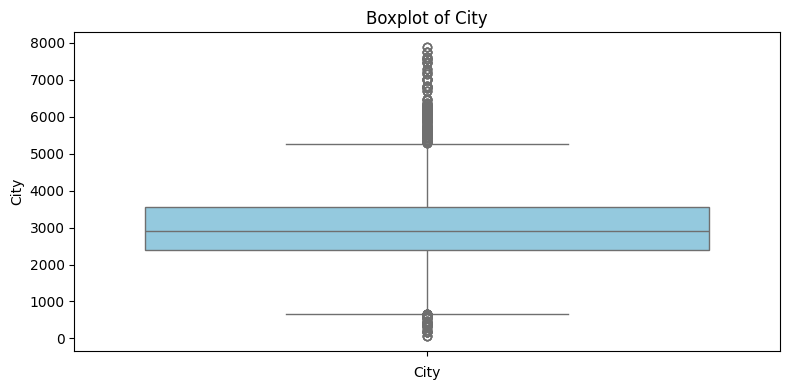

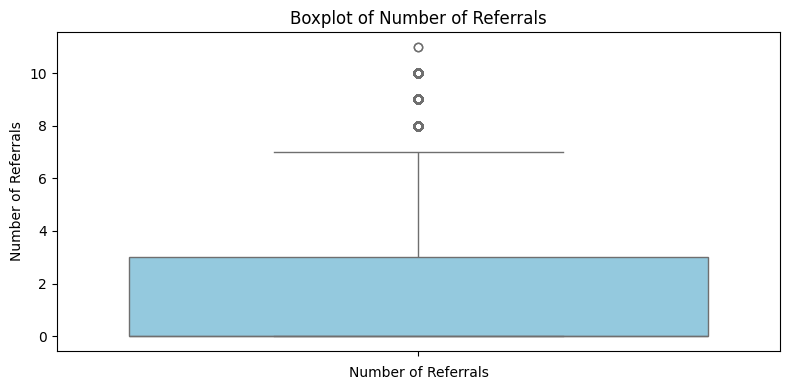

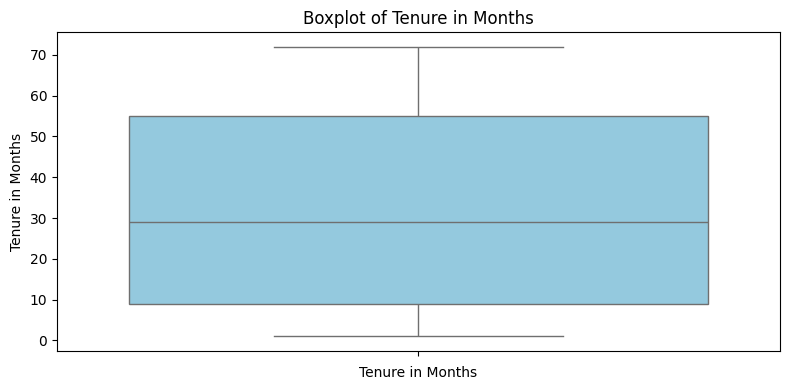

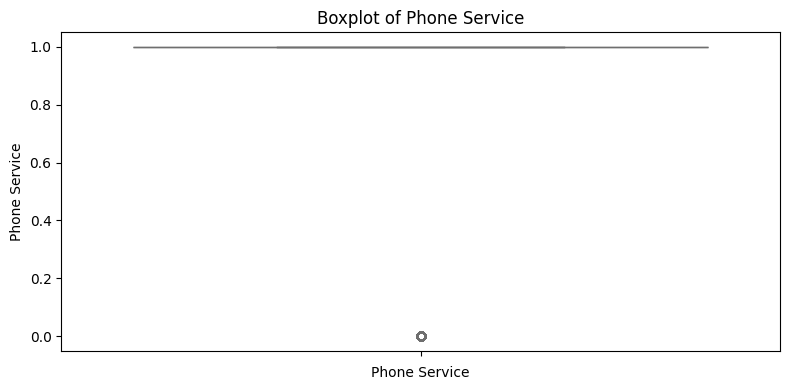

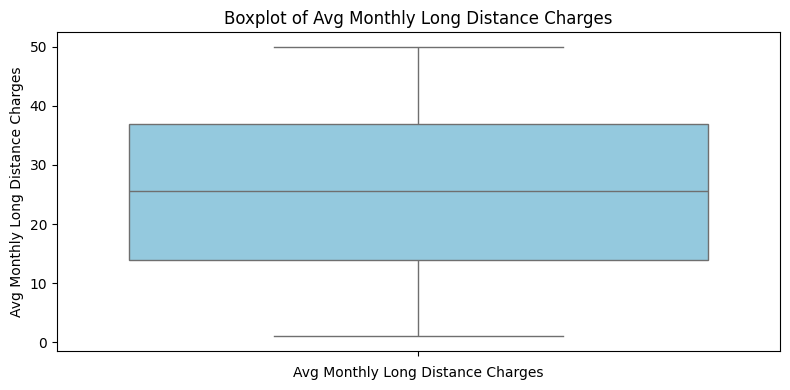

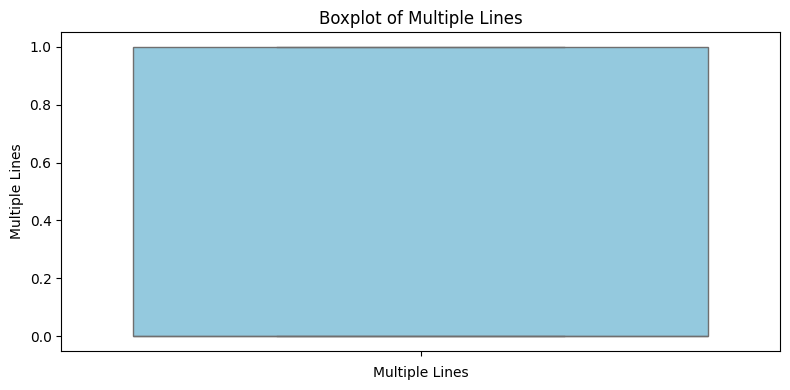

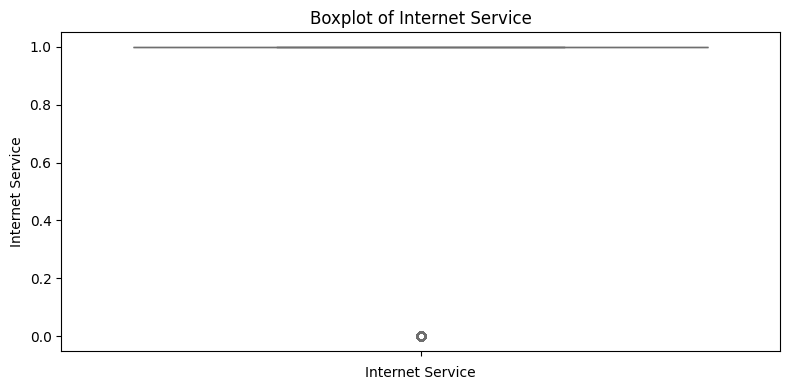

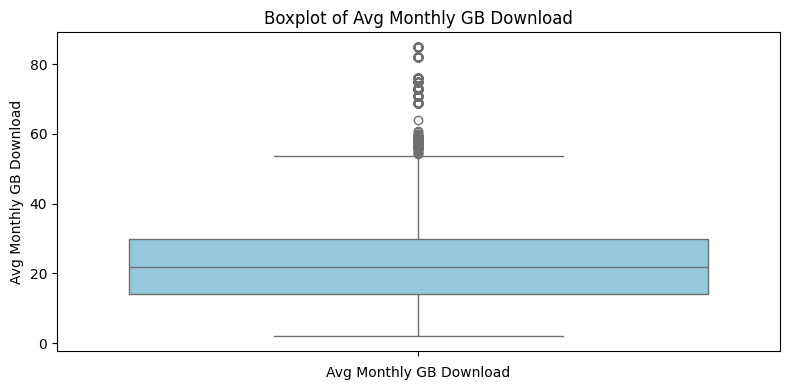

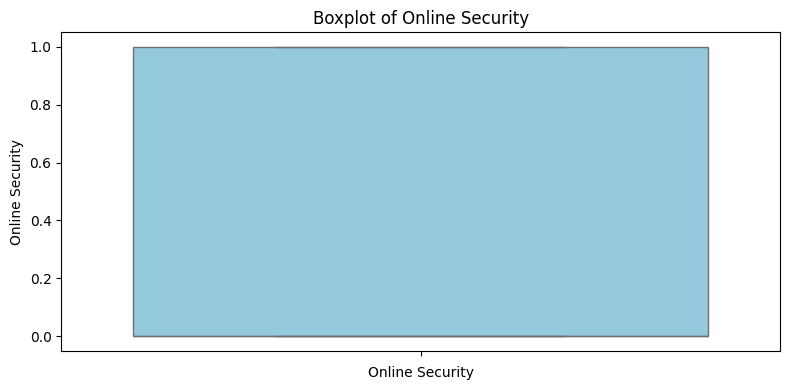

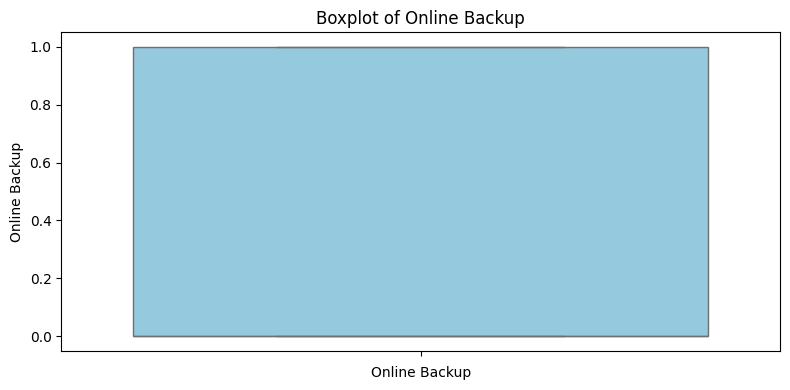

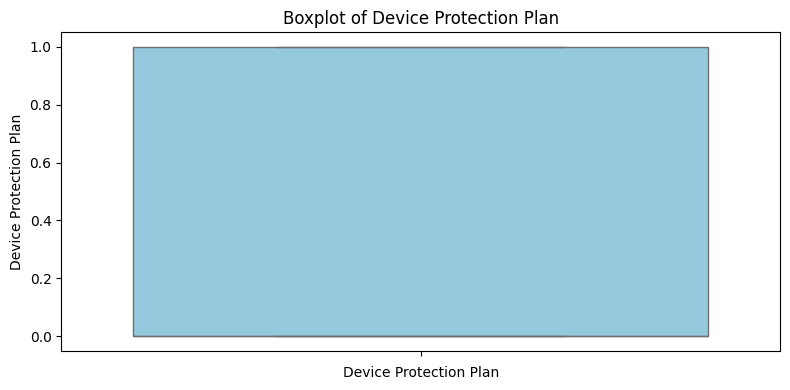

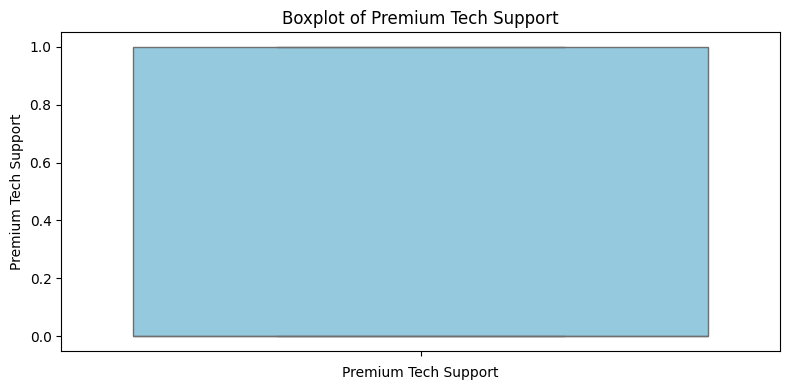

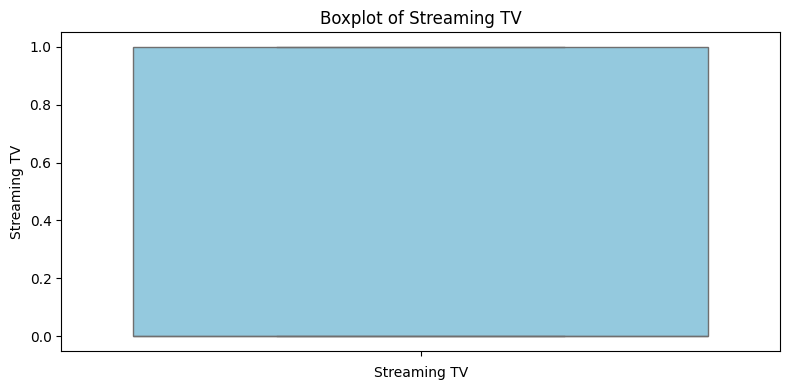

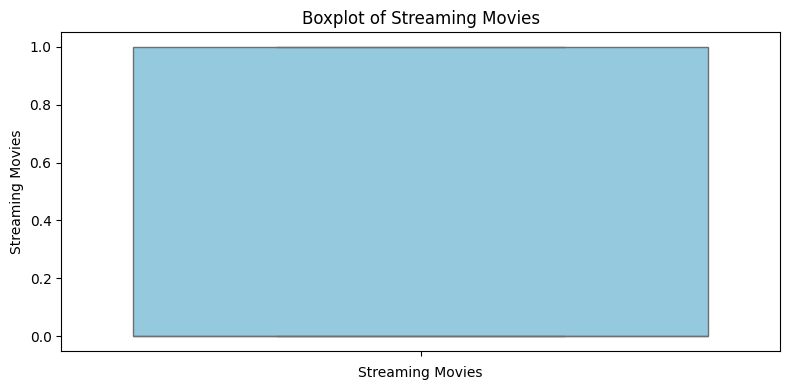

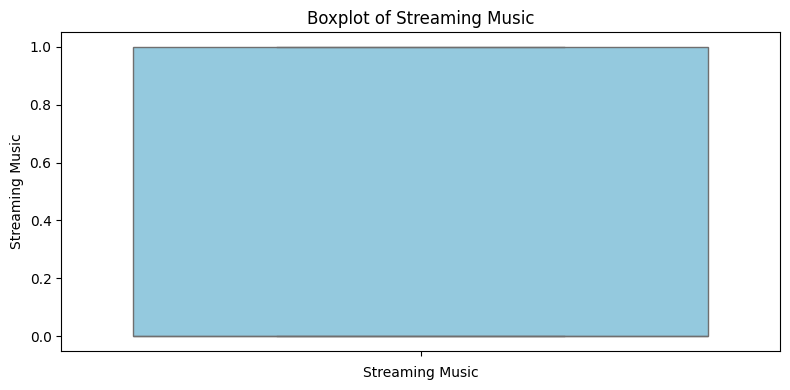

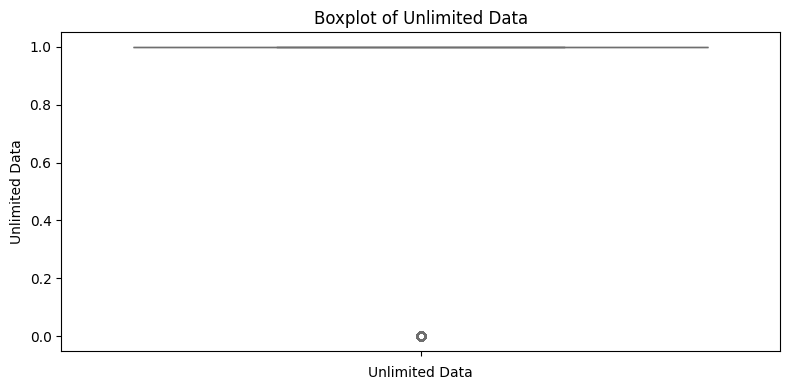

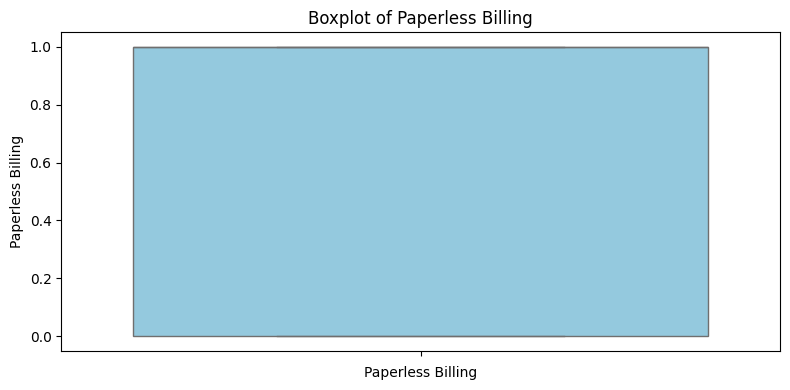

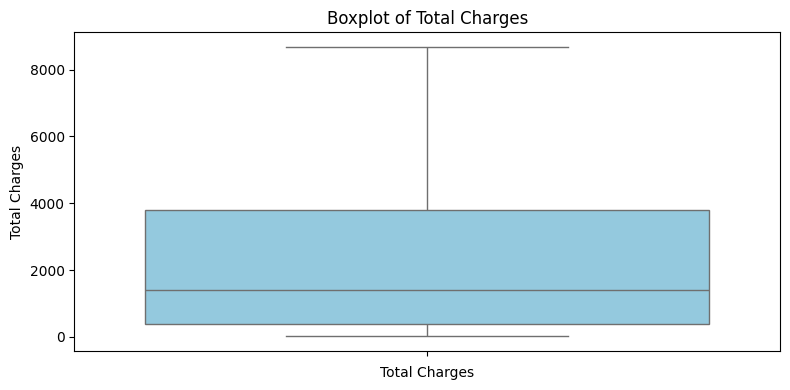

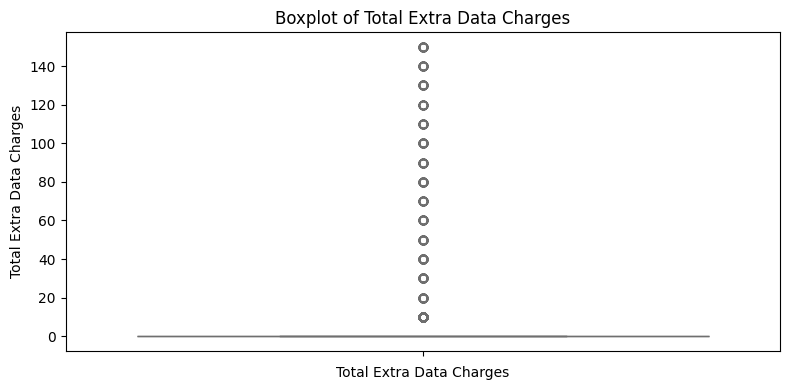

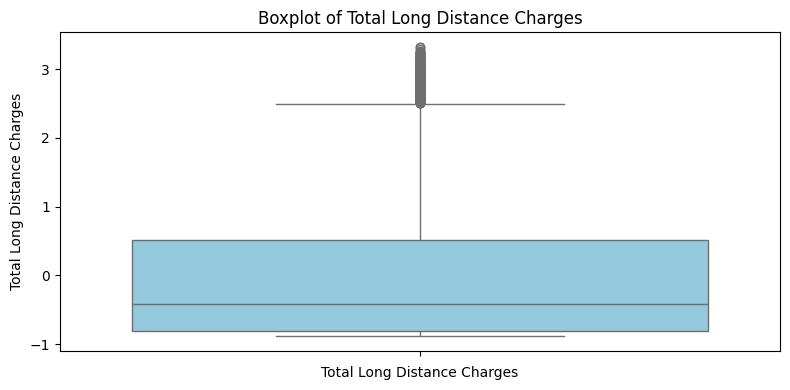

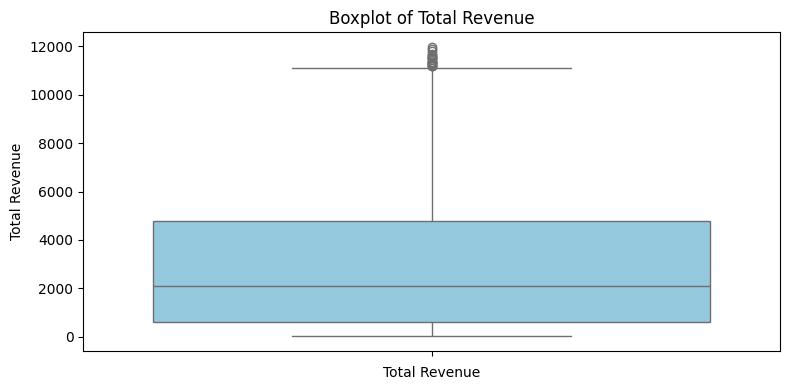

In [16]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns


for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


In [17]:
df=df.drop('Total Charges',axis=1)


In [18]:

print(df['Total Revenue'].mean())

3034.3790558000856


In [27]:
X=df.drop(['Total Revenue'],axis=1)
y=df['Total Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = RobustScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




In [28]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(alpha=0.1),
    'SVM': SVR(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42)
}

results = []
for name, model in models.items():
  
    model.fit(X_train_scaled, y_train)
    
    
    train_preds = model.predict(X_train_scaled)
    test_preds = model.predict(X_test_scaled)
    
    
    train_r2 = r2_score(y_train, train_preds)
    test_r2 = r2_score(y_test, test_preds)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
    
 
    results.append({
        'Model': name,
        'Train R2': train_r2,
        'Test R2': test_r2,
        'R2 Difference': train_r2 - test_r2,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'RMSE Difference': train_rmse - test_rmse
    })
    
   
    print(f"\n{name}")
    print("Training Metrics:")
    print(f"  R2 Score: {train_r2:.4f}")
    print(f"  RMSE: {train_rmse:.2f}")
    print("Testing Metrics:")
    print(f"  R2 Score: {test_r2:.4f}")
    print(f"  RMSE: {test_rmse:.2f}")
    print(f"  Overfitting Indicator (R2 diff): {train_r2 - test_r2:.4f}")


results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:")
print(results_df.sort_values('Test R2', ascending=False))









Linear Regression
Training Metrics:
  R2 Score: 0.9397
  RMSE: 707.47
Testing Metrics:
  R2 Score: 0.9380
  RMSE: 697.33
  Overfitting Indicator (R2 diff): 0.0017

Lasso
Training Metrics:
  R2 Score: 0.9397
  RMSE: 707.47
Testing Metrics:
  R2 Score: 0.9380
  RMSE: 697.33
  Overfitting Indicator (R2 diff): 0.0017

SVM
Training Metrics:
  R2 Score: -0.0949
  RMSE: 3014.55
Testing Metrics:
  R2 Score: -0.0976
  RMSE: 2933.99
  Overfitting Indicator (R2 diff): 0.0027

Random Forest
Training Metrics:
  R2 Score: 0.9991
  RMSE: 84.98
Testing Metrics:
  R2 Score: 0.9937
  RMSE: 222.78
  Overfitting Indicator (R2 diff): 0.0055

XGBoost
Training Metrics:
  R2 Score: 0.9997
  RMSE: 53.36
Testing Metrics:
  R2 Score: 0.9959
  RMSE: 179.43
  Overfitting Indicator (R2 diff): 0.0038

Model Performance Comparison:
               Model  Train R2   Test R2  R2 Difference   Train RMSE  \
4            XGBoost  0.999657  0.995895       0.003762    53.359729   
3      Random Forest  0.999130  0.993672   

In [29]:
models = {
        'Random Forest': RandomForestRegressor(n_estimators=10, random_state=42)
}

results = []
for name, model in models.items():
  
    model.fit(X_train_scaled, y_train)
    
    
    train_preds = model.predict(X_train_scaled)
    test_preds = model.predict(X_test_scaled)
    
    
    train_r2 = r2_score(y_train, train_preds)
    test_r2 = r2_score(y_test, test_preds)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
    
 
    results.append({
        'Model': name,
        'Train R2': train_r2,
        'Test R2': test_r2,
        'R2 Difference': train_r2 - test_r2,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'RMSE Difference': train_rmse - test_rmse
    })
    
   
    print(f"\n{name}")
    print("Training Metrics:")
    print(f"  R2 Score: {train_r2:.4f}")
    print(f"  RMSE: {train_rmse:.2f}")
    print("Testing Metrics:")
    print(f"  R2 Score: {test_r2:.4f}")
    print(f"  RMSE: {test_rmse:.2f}")
    print(f"  Overfitting Indicator (R2 diff): {train_r2 - test_r2:.4f}")


results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:")
print(results_df.sort_values('Test R2', ascending=False))









Random Forest
Training Metrics:
  R2 Score: 0.9985
  RMSE: 112.30
Testing Metrics:
  R2 Score: 0.9921
  RMSE: 249.59
  Overfitting Indicator (R2 diff): 0.0064

Model Performance Comparison:
           Model  Train R2   Test R2  R2 Difference  Train RMSE   Test RMSE  \
0  Random Forest  0.998481  0.992057       0.006423  112.295411  249.586355   

   RMSE Difference  
0      -137.290944  
